<a href="https://colab.research.google.com/github/majetikalyan007/ML-algorithms/blob/main/k_medoid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

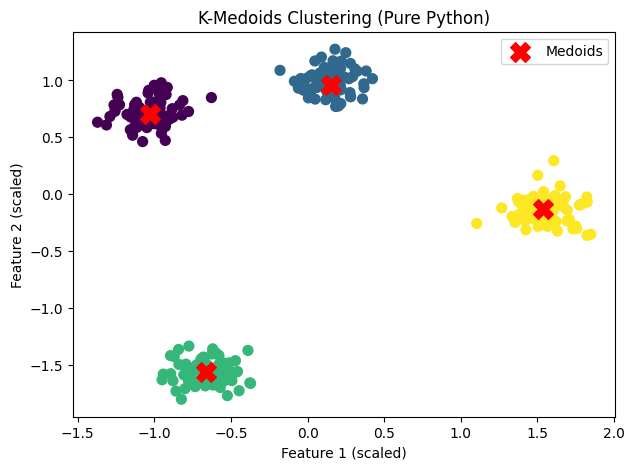

In [5]:
# ---------------------------------------------------------------
# Simple K-Medoids Implementation (No external library needed)
# ---------------------------------------------------------------
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

# Step 1: Generate dataset
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Step 2: Define K-Medoids function
def k_medoids(X, k, max_iter=100):
    # Randomly choose initial medoids
    m = X.shape[0]
    medoid_indices = np.random.choice(m, k, replace=False)
    medoids = X[medoid_indices]

    for _ in range(max_iter):
        # Assign each point to nearest medoid
        distances = pairwise_distances(X, medoids)
        labels = np.argmin(distances, axis=1)

        new_medoids = np.copy(medoids)
        # Recalculate medoids
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0:
                continue
            intra_distances = pairwise_distances(cluster_points, cluster_points)
            total_distance = np.sum(intra_distances, axis=1)
            new_medoids[i] = cluster_points[np.argmin(total_distance)]

        # Stop if medoids do not change
        if np.allclose(new_medoids, medoids):
            break
        medoids = new_medoids

    return medoids, labels

# Step 3: Run K-Medoids
k = 4
medoids, labels = k_medoids(X, k)

# Step 4: Visualize clusters
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)
plt.scatter(medoids[:, 0], medoids[:, 1], c='red', s=200, marker='X', label='Medoids')
plt.title('K-Medoids Clustering (Pure Python)')
plt.xlabel('Feature 1 (scaled)')
plt.ylabel('Feature 2 (scaled)')
plt.legend()
plt.show()
